
🧪 [외부 테스트셋(30%) 평가 성능]
MAE : 0.54
MSE : 0.54
R²  : 0.9737


C:\Users\In\AppData\Local\Temp\ipykernel_16064\3236806656.py:56: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\In\Desktop\프로젝트\SKN13-2nd-2Team\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


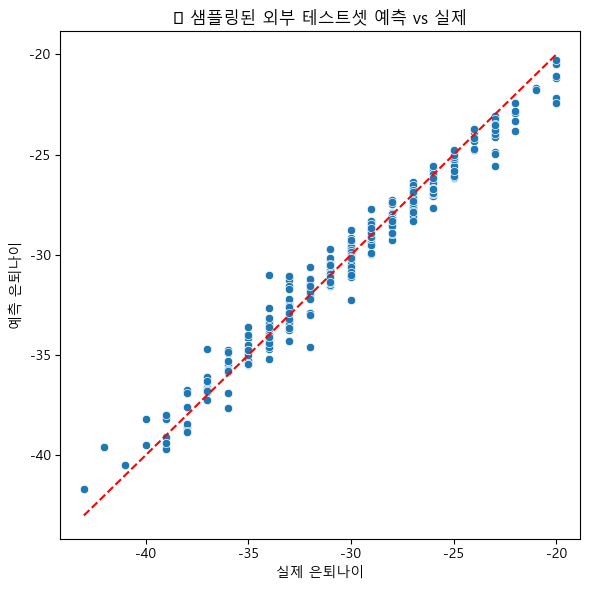


🔍 오차 큰 선수 TOP 10
     실제 은퇴나이  예측 은퇴나이  오차(년)
155      -34   -30.99  -3.01
43       -32   -34.59   2.59
112      -23   -25.59   2.59
79       -20   -22.43   2.43
136      -42   -39.57  -2.43
1        -37   -34.71  -2.29
63       -30   -32.26   2.26
21       -20   -22.17   2.17
302      -23   -24.95   1.95
186      -33   -31.07  -1.93


C:\Users\In\AppData\Local\Temp\ipykernel_16064\3236806656.py:75: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\In\Desktop\프로젝트\SKN13-2nd-2Team\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


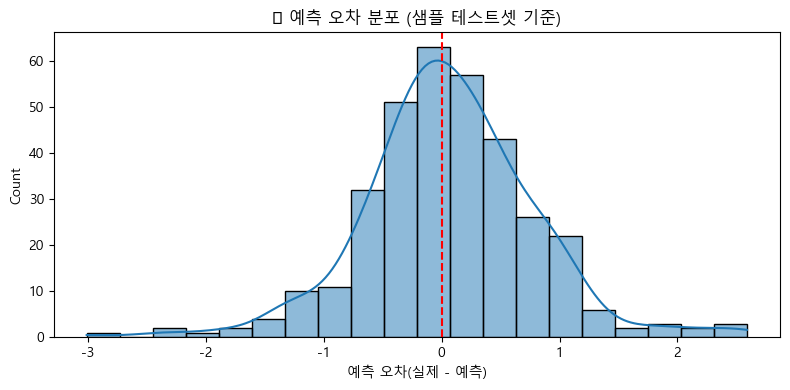

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

# 1. 훈련 데이터 불러오기
train_df = pd.read_csv(r"C:\Users\In\Desktop\프로젝트\SKN13-2nd-2Team\data\mingyu\kbo_retired_total.csv")

# 1-1. 은퇴나이 계산: birth_year - retire_year
train_df['은퇴_나이'] = train_df['birth_year'] - train_df['retire_year']

# 2. 훈련 데이터 피처, 타깃 분리
target_col = '은퇴_나이'
X_train = train_df.drop(columns=[target_col, '선수명'], errors='ignore')
y_train = train_df[target_col]
X_train = pd.get_dummies(X_train)

# 3. 테스트셋 로드
test_df = pd.read_csv(
    r"C:\Users\In\Desktop\프로젝트\SKN13-2nd-2Team\data\mingyu\kbo_retired_total.csv", encoding='utf-8')
test_df['은퇴_나이'] = test_df['birth_year'] - test_df['retire_year']

# 3-3. 테스트셋에서 30% 샘플만 사용
test_sampled_df, _ = train_test_split(test_df, test_size=0.7, random_state=42)

# 4. 테스트 피처/타깃 분리 및 인코딩
y_test = test_sampled_df[target_col]
X_test = test_sampled_df.drop(columns=[target_col, '선수명'], errors='ignore')
X_test = pd.get_dummies(X_test)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 5. 모델 학습 및 예측
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 6. 성능 평가
print("\n [외부 테스트셋(30%) 평가 성능]")
print("MAE :", round(mean_absolute_error(y_test, y_pred), 2))
print("MSE :", round(mean_squared_error(y_test, y_pred), 2))
print("R²  :", round(r2_score(y_test, y_pred), 4))

# 7. 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 8. 예측 vs 실제 산점도
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('실제 은퇴나이')
plt.ylabel('예측 은퇴나이')
plt.title('샘플링된 외부 테스트셋 예측 vs 실제')
plt.tight_layout()
plt.show()

# 9. 오차 분석 TOP 10
result_df = pd.DataFrame({
    '실제 은퇴나이': y_test.values,
    '예측 은퇴나이': y_pred,
    '오차(년)': y_test.values - y_pred
})

print("\n 오차 큰 선수 TOP 10")
print(result_df.sort_values(by='오차(년)', key=abs, ascending=False).head(10))

# 10. 오차 분포 히스토그램
plt.figure(figsize=(8, 4))
sns.histplot(result_df['오차(년)'], bins=20, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('🧪 예측 오차 분포 (샘플 테스트셋 기준)')
plt.xlabel('예측 오차(실제 - 예측)')
plt.tight_layout()
plt.show()